In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

font = {'size': 20}
rc('font', **font)
plt.style.use('seaborn-dark-palette')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_lat = pd.read_pickle('../data/SRP/custs_by_address.pkl')

In [3]:
df_cust = pd.read_pickle('../data/SRP/cust_table_out.pkl')

In [4]:
df_comb = df_cust.join(df_lat[['latitude', 'longitude']])
df_comb.head()

,qty_shrink_per_day,shrink_value_per_day,POP2010,FD_ratio,unemp_rate,dens_sq_mile,street,city,state,zip_code,avg_UPC_per_visit,days_between_visits,last_visit,cluster,latitude,longitude
address1,,,,,,,,,,,,,,,,
#500 PACWEST/JACKSON,0.038061,0.347094,425363.0,0.228642,0.07,473.294897,917 W MAIN ST,BATTLE GROUND,WA,98604,2.250000,19.250000,2017-11-21,3,45.780949,-122.533431
#501 PACWEST/JACKSON,0.041153,0.425020,425363.0,0.228642,0.08,2995.890411,404 NE 78TH ST,VANCOUVER,WA,98665,3.250000,22.000000,2017-12-13,3,45.676273,-122.657079
#502 PACWEST/JACKSON,0.035387,0.358387,425363.0,0.228642,0.08,2995.890411,8515 NE ANDERSEN RD,VANCOUVER,WA,98665,2.777778,19.555556,2017-12-13,3,45.676273,-122.657079
#504 PACWEST/JACKSON,-0.047619,-0.404762,735334.0,0.096296,0.07,4304.958678,5829 NE MARTIN LUTHER KING BLVD,PORTLAND,OR,97211,1.000000,0.000000,2017-10-30,2,45.576736,-122.638672
#505 PACWEST/JACKSON,0.030754,0.133134,735334.0,0.096296,0.06,6111.880661,15 NE BROADWAY ST,PORTLAND,OR,97232,2.000000,25.500000,2017-11-22,2,45.529553,-122.646316


In [122]:
df()

11798

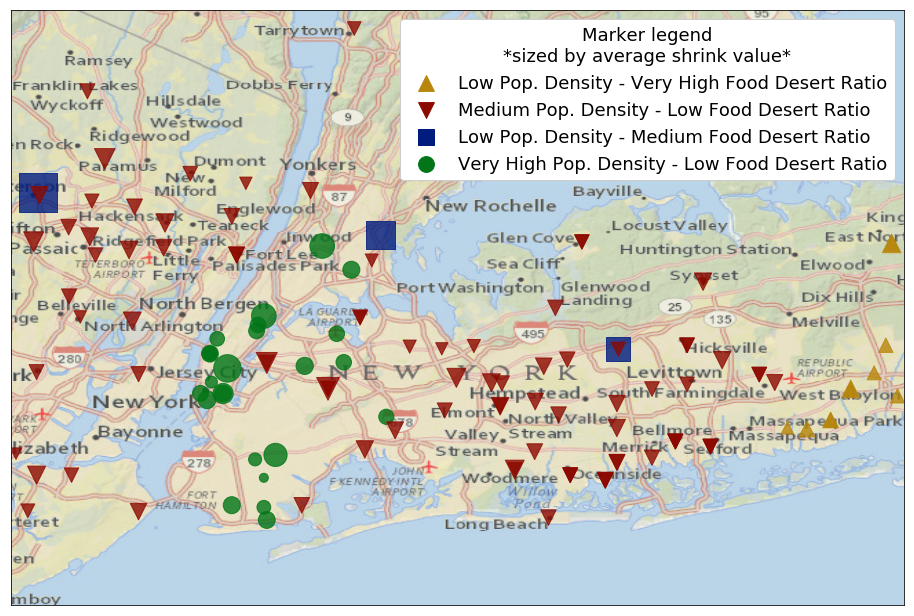

In [22]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

m = Basemap(projection='cyl', lat_0 = 39, lon_0 = -94,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=-74.2, llcrnrlat=40.5,
    urcrnrlon=-73.3, urcrnrlat=41.1)
 
#m.drawcountries()
img = m.arcgisimage(service='NatGeo_World_Map', xpixels=900, ypixels=600, dpi=500, ax=ax)
img.set_alpha(0.7)

colors = ['C0', 'C1', 'C2', 'C4']
marker = ['s', 'o', 'v', '^']
labels = ['Low Pop. Density - Medium Food Desert Ratio', 'Very High Pop. Density - Low Food Desert Ratio', 
          'Medium Pop. Density - Low Food Desert Ratio', 'Low Pop. Density - Very High Food Desert Ratio']

shrink_min = df_comb.shrink_value_per_day.values.min()
for clust in df_comb.cluster.unique():
    foo = df_comb[ df_comb.cluster == clust ].sample(frac=0.3, random_state=6)
    lats = foo.latitude.values
    longs = foo.longitude.values
    shrink = foo.shrink_value_per_day.values
    size = (((shrink - shrink_min) + 1) * 0.2) ** 12.5
    x, y = m(longs, lats)
    m.scatter(x, y, marker=marker[int(clust)], color=colors[int(clust)], s=size, 
              zorder=int(clust)+3, label=labels[int(clust)], alpha=0.8)
legend = ax.legend(loc=1, fontsize=18, framealpha=1, fancybox=True)
legend.set_title('Marker legend\n*sized by average shrink value*', prop={'size':18})
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([250])
    legend_handle.set_alpha(1)
plt.setp(legend.get_title(), multialignment='center')
plt.savefig('../images/map.png');

In [9]:
df_cust.groupby('cluster').count()

,qty_shrink_per_day,shrink_value_per_day,POP2010,FD_ratio,unemp_rate,dens_sq_mile,street,city,state,zip_code,avg_UPC_per_visit,days_between_visits,last_visit
cluster,,,,,,,,,,,,,
0,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564
1,767,767,767,767,767,767,767,767,767,767,767,767,767
2,4821,4821,4821,4821,4821,4821,4821,4821,4821,4821,4821,4821,4821
3,4646,4646,4646,4646,4646,4646,4646,4646,4646,4646,4646,4646,4646


[None, None]

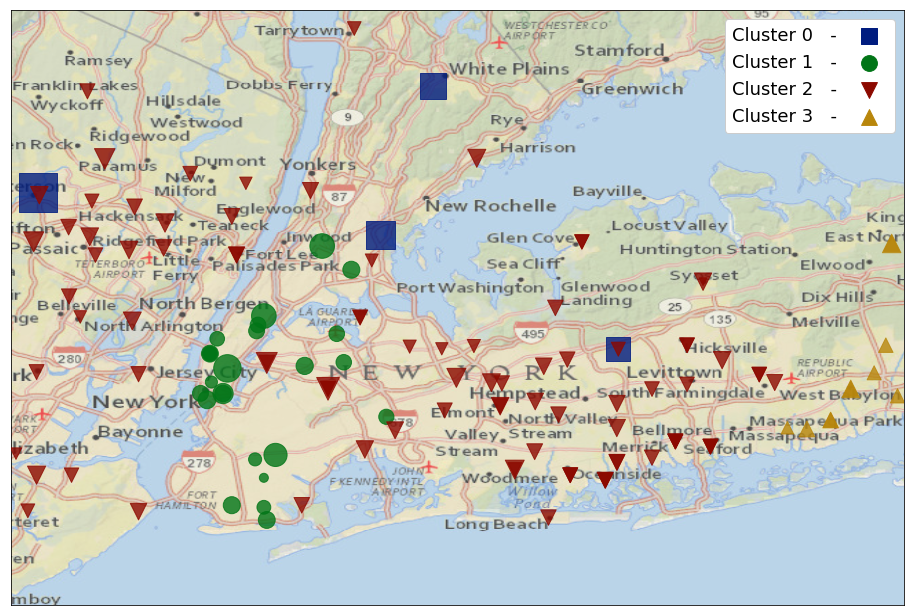

In [32]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

m = Basemap(projection='cyl', lat_0 = 39, lon_0 = -94,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=-74.2, llcrnrlat=40.5,
    urcrnrlon=-73.3, urcrnrlat=41.1)
 
#m.drawcountries()
img = m.arcgisimage(service='NatGeo_World_Map', xpixels=900, ypixels=600, dpi=500, ax=ax)
img.set_alpha(0.7)

colors = ['C0', 'C1', 'C2', 'C4']
marker = ['s', 'o', 'v', '^']
labels = ['Low Pop. Density - Medium Food Desert Ratio', 'Very High Pop. Density - Low Food Desert Ratio', 
          'Medium Pop. Density - Low Food Desert Ratio', 'Low Pop. Density - Very High Food Desert Ratio']

shrink_min = df_comb.shrink_value_per_day.values.min()
for clust in sorted(df_comb.cluster.unique()):
    foo = df_comb[ df_comb.cluster == clust ].sample(frac=0.3, random_state=6)
    lats = foo.latitude.values
    longs = foo.longitude.values
    shrink = foo.shrink_value_per_day.values
    size = (((shrink - shrink_min) + 1) * 0.2) ** 12.5
    x, y = m(longs, lats)
    m.scatter(x, y, marker=marker[int(clust)], color=colors[int(clust)], s=size, 
              zorder=int(clust)+3, label='Cluster {}   -'.format(clust), alpha=0.8)
legend = ax.legend(loc=1, fontsize=18, framealpha=1, fancybox=True, markerfirst=False)
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([250])
    legend_handle.set_alpha(1)
plt.setp(legend.get_title(), multialignment='center')